In [1]:
import mne
import matplotlib.pyplot as plt

Creating RawArray with float64 data, n_channels=128, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


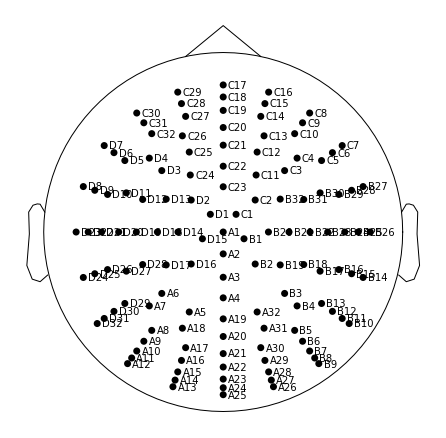

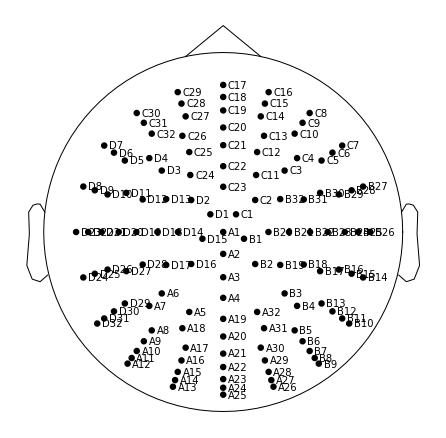

In [2]:
Adquisition_eq="biosemi128"
montage = mne.channels.make_standard_montage(Adquisition_eq)
montage.plot()

# https://www.frontiersin.org/articles/10.3389/fneur.2020.00375/full

## Dataset
Data is epoched, keeping only the 4.5s length signals correpsonding to the time window between the beginning of the concentration interval and the end of the relacation interval.


In [3]:
import data_preprocessing as dp
import tensorflow as tf

data, events = dp.load_data()

In [4]:
data, events = dp.choose_condition(data, events, 'inner speech')

In [5]:
import numpy as np
data = data.astype(np.float16)
dataset = tf.data.Dataset.from_tensor_slices((data, events[:, 1]))
dataset = dp.preprocessing_pipeline(dataset, dp.filter_interval, [[2,2.5], 256])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

<function filter_interval at 0x17ee92e50> [[2, 2.5], 256]


2022-02-20 15:34:05.424777: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-20 15:34:05.424996: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
datasets = dp.split_dataset(dataset)

2022-02-20 15:34:05.678488: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
